In [424]:
import pandas as pd
pd.set_option('display.max_columns', 60)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [425]:
data = pd.read_csv('C:\\Users\\ander\\Downloads\\data science\\Machine learning\\ml\\Módulo 1\\Datasets\\recipeData.csv', encoding='ISO-8859-1')

In [426]:
data.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [427]:
data.shape

(73861, 23)

In [428]:
data.dtypes

BeerID             int64
Name              object
URL               object
Style             object
StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
PrimingMethod     object
PrimingAmount     object
UserId           float64
dtype: object

In [429]:
categorias = data['StyleID'].value_counts()

In [430]:
amostras = categorias[categorias > 1000].index

amostras

Int64Index([7, 10, 134, 9, 4, 30, 86, 12, 92, 6, 175, 39], dtype='int64')

In [431]:
arquivo = data.loc[data['StyleID'].isin(amostras)]

In [432]:
arquivo.shape

(35424, 23)

In [433]:
arquivo.head(3)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
5,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,Specific Gravity,All Grain,1.0,NaN,NaN,NaN,5889.0


In [434]:
(arquivo.isnull().sum() / len(arquivo['Color'])) * 100 

BeerID            0.000000
Name              0.002823
URL               0.000000
Style             0.000000
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       3.669828
Efficiency        0.000000
MashThickness    40.918586
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        55.185750
PrimaryTemp      31.800474
PrimingMethod    91.841689
PrimingAmount    94.198848
UserId           69.320235
dtype: float64

In [435]:
arquivo.drop(['BeerID', 'Name', 'URL', 'UserId', 'PrimingAmount', 'PrimingMethod', 'PitchRate',  'MashThickness'], axis=1, inplace=True)

C:\Users\ander\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [436]:
arquivo.head()

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod,PrimaryTemp
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,Specific Gravity,extract,NaN
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,Specific Gravity,All Grain,NaN
5,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,Specific Gravity,All Grain,NaN
6,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,Specific Gravity,All Grain,NaN
9,Imperial IPA,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,Specific Gravity,All Grain,21.11


In [437]:
arquivo.shape

(35424, 15)

In [438]:
(arquivo.isnull().sum() / len(arquivo['Style'])) * 100 

Style           0.000000
StyleID         0.000000
Size(L)         0.000000
OG              0.000000
FG              0.000000
ABV             0.000000
IBU             0.000000
Color           0.000000
BoilSize        0.000000
BoilTime        0.000000
BoilGravity     3.669828
Efficiency      0.000000
SugarScale      0.000000
BrewMethod      0.000000
PrimaryTemp    31.800474
dtype: float64

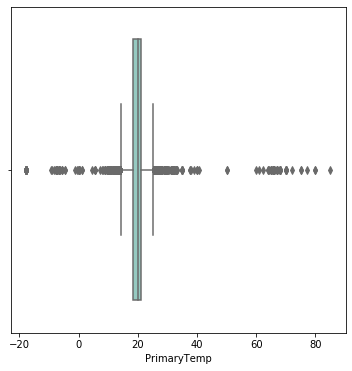

In [439]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=arquivo['PrimaryTemp'], palette="Set3");

In [440]:
arquivo['PrimaryTemp'].fillna(arquivo['PrimaryTemp'].median(), inplace=True)
arquivo['BoilGravity'].fillna(arquivo['BoilGravity'].median(), inplace=True)

C:\Users\ander\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [441]:
(arquivo.isnull().sum() / len(arquivo['Style'])) * 100 

Style          0.0
StyleID        0.0
Size(L)        0.0
OG             0.0
FG             0.0
ABV            0.0
IBU            0.0
Color          0.0
BoilSize       0.0
BoilTime       0.0
BoilGravity    0.0
Efficiency     0.0
SugarScale     0.0
BrewMethod     0.0
PrimaryTemp    0.0
dtype: float64

In [442]:
arquivo.head()

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod,PrimaryTemp
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.047,70.0,Specific Gravity,extract,20.00
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.047,70.0,Specific Gravity,All Grain,20.00
5,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,Specific Gravity,All Grain,20.00
6,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,1.047,75.0,Specific Gravity,All Grain,20.00
9,Imperial IPA,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,Specific Gravity,All Grain,21.11


In [443]:
arquivo['Style'].value_counts()

American IPA              11940
American Pale Ale          7581
Saison                     2617
American Light Lager       2277
American Amber Ale         2038
Blonde Ale                 1753
Imperial IPA               1478
American Stout             1268
Irish Red Ale              1204
American Brown Ale         1152
Witbier                    1072
California Common Beer     1044
Name: Style, dtype: int64

In [444]:
arquivo['SugarScale'].replace({'Plato': 0, 'Specific Gravity': 1}, inplace=True)

C:\Users\ander\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [445]:
arquivo.head()

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod,PrimaryTemp
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.047,70.0,1,extract,20.00
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.047,70.0,1,All Grain,20.00
5,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,1,All Grain,20.00
6,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,1.047,75.0,1,All Grain,20.00
9,Imperial IPA,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,1,All Grain,21.11


In [446]:
encode_brewmethod = pd.get_dummies(arquivo['BrewMethod'])

In [447]:
encode_brewmethod.head()

,All Grain,BIAB,Partial Mash,extract
2,0,0,0,1
3,1,0,0,0
5,1,0,0,0
6,1,0,0,0
9,1,0,0,0


In [448]:
data = pd.concat([arquivo, encode_brewmethod], axis=1)
data.drop(['BrewMethod', 'Style'], axis=1, inplace=True)

In [449]:
data.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,PrimaryTemp,All Grain,BIAB,Partial Mash,extract
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.047,70.0,1,20.00,0,0,0,1
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.047,70.0,1,20.00,1,0,0,0
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,1,20.00,1,0,0,0
6,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,1.047,75.0,1,20.00,1,0,0,0
9,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,1,21.11,1,0,0,0


In [450]:
data.dtypes

StyleID           int64
Size(L)         float64
OG              float64
FG              float64
ABV             float64
IBU             float64
Color           float64
BoilSize        float64
BoilTime          int64
BoilGravity     float64
Efficiency      float64
SugarScale        int64
PrimaryTemp     float64
All Grain         uint8
BIAB              uint8
Partial Mash      uint8
extract           uint8
dtype: object

In [451]:
data['extract'] = data['extract'].astype(int)
data['Partial Mash'] = data['Partial Mash'].astype(int)
data['BIAB'] = data['BIAB'].astype(int)
data['All Grain'] = data['All Grain'].astype(int)

In [452]:
data.dtypes

StyleID           int64
Size(L)         float64
OG              float64
FG              float64
ABV             float64
IBU             float64
Color           float64
BoilSize        float64
BoilTime          int64
BoilGravity     float64
Efficiency      float64
SugarScale        int64
PrimaryTemp     float64
All Grain         int32
BIAB              int32
Partial Mash      int32
extract           int32
dtype: object

In [453]:
data.shape

(35424, 17)

In [454]:
y = data['StyleID']
x = data.drop('StyleID', axis=1)

In [455]:
x.dtypes

Size(L)         float64
OG              float64
FG              float64
ABV             float64
IBU             float64
Color           float64
BoilSize        float64
BoilTime          int64
BoilGravity     float64
Efficiency      float64
SugarScale        int64
PrimaryTemp     float64
All Grain         int32
BIAB              int32
Partial Mash      int32
extract           int32
dtype: object

In [456]:
data

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,PrimaryTemp,All Grain,BIAB,Partial Mash,extract
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.047,70.0,1,20.00,0,0,0,1
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.047,70.0,1,20.00,1,0,0,0
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,1,20.00,1,0,0,0
6,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,1.047,75.0,1,20.00,1,0,0,0
9,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,1,21.11,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73853,7,18.93,1.073,1.018,7.15,0.00,6.01,22.71,60,1.060,70.0,1,20.00,0,1,0,0
73854,10,18.93,1.064,1.016,6.26,0.00,9.60,28.39,60,1.042,75.0,1,20.00,0,1,0,0
73855,7,22.71,1.065,1.014,6.71,49.35,4.73,15.14,30,1.098,55.0,1,20.00,0,0,1,0
73859,92,24.00,1.051,1.014,4.82,25.65,14.12,28.00,60,1.043,72.0,1,18.00,1,0,0,0


In [457]:
x

,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,PrimaryTemp,All Grain,BIAB,Partial Mash,extract
2,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.047,70.0,1,20.00,0,0,0,1
3,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.047,70.0,1,20.00,1,0,0,0
5,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,1,20.00,1,0,0,0
6,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,1.047,75.0,1,20.00,1,0,0,0
9,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,1,21.11,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73853,18.93,1.073,1.018,7.15,0.00,6.01,22.71,60,1.060,70.0,1,20.00,0,1,0,0
73854,18.93,1.064,1.016,6.26,0.00,9.60,28.39,60,1.042,75.0,1,20.00,0,1,0,0
73855,22.71,1.065,1.014,6.71,49.35,4.73,15.14,30,1.098,55.0,1,20.00,0,0,1,0
73859,24.00,1.051,1.014,4.82,25.65,14.12,28.00,60,1.043,72.0,1,18.00,1,0,0,0


##### **Iniciando validação cruzada:**

In [458]:
# Importando validação cruzada:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Importando modelos:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Criando modelos:
linear = LinearRegression()
lasso = Lasso()
ridge = Ridge()
logistic = LogisticRegression()
knn = KNeighborsClassifier()
naive = GaussianNB()
tree = DecisionTreeClassifier()
stkfold = StratifiedKFold(n_splits=5)

# Normalizando as variáveis preditoras para o algoritmo de KNN:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range=(0, 1))
x_norm = normalizador.fit_transform(x)

# Criando validação cruzada:
cv_linear = cross_val_score(linear, x, y, cv=stkfold, n_jobs=-1)

cv_lasso = cross_val_score(lasso, x, y, cv=stkfold, n_jobs=-1)

cv_ridge = cross_val_score(ridge, x, y, cv=stkfold, n_jobs=-1)

cv_logistic = cross_val_score(logistic, x, y, cv=stkfold, n_jobs=-1)

cv_knn = cross_val_score(knn, x_norm, y, cv=stkfold, n_jobs=-1)

cv_naive = cross_val_score(naive,  x, y, cv=stkfold, n_jobs=-1)

cv_tree = cross_val_score(tree,  x, y, cv=stkfold, n_jobs=-1)

# Armazenando resultados:
cv_linear_result = cv_linear.mean() * 100
cv_lasso_result = cv_lasso.mean() * 100
cv_ridge_result = cv_ridge.mean() * 100
cv_logistic_result = cv_logistic.mean() * 100
cv_knn_result = cv_knn.mean() * 100
cv_naive_result = cv_naive.mean() * 100
cv_tree_result = cv_tree.mean() * 100

""" 
resultados = {'Linear': cv_linear_result, 
              'Lasso': cv_lasso_result, 
              'Ridge': cv_ridge_result, 
              'Logistic': cv_logistic_result,
              'KNN': cv_knn_result, 
              'Naive': cv_naive_result, 
              'Tree': cv_tree_result}
"""
print('Linear', cv_linear_result)
print('Lasso', cv_lasso_result)
print('Ridge', cv_ridge_result)
print('Logistic', cv_logistic_result)
print('KNN', cv_knn_result)
print('Naive', cv_naive_result)
print('Tree', cv_tree_result)


#for modelo, resultado in resultados.items:
    #print(modelo + ': ' + str(resultado))

Linear 7.074313154501426
Lasso 7.047839170835308
Ridge 7.074611741717933
Logistic 44.48666373563633
KNN 51.18295573537879
Naive 41.70028873809692
Tree 47.614517314917


##### **Fazendo Ajuste fino dos parâmetros com os modelos: KNN, DecisionTree e LogisticRegression**

In [460]:
from sklearn.model_selection import GridSearchCV

# Criando os grids KNN:
vizinhos = [3, 5, 7, 9, 11]
distancia =['minkowski', 'chebyshev']
valoresp = np.array([1, 2, 3, 4])

knn_param = {'n_neighbors': vizinhos, 'metric': distancia, 'p': valoresp}

knn_grid = GridSearchCV(estimator=knn, param_grid=knn_param, cv=5, n_jobs=-1)
knn_ajustado = knn_grid.fit(x_norm, y)


# Criando os grids DecisionTree:
criterios = ['gini', 'entropy']
profundidade_max = np.array([2, 4, 6])
folhas_min = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])

tree_param = {'criterion': criterios, 'max_depth': profundidade_max, 'min_samples_split': folhas_min}

tree_grid = GridSearchCV(estimator=tree, param_grid=tree_param, cv=5, n_jobs=-1)
tree_ajustado = tree_grid.fit(x, y)


# Criando os grids LogisticRegression:
penalidade = ['l1', 'l2']
c = np.array([0.001, 0.02, 0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 10, 20, 50, 100])

logistic_param = {'penalty': penalidade, 'C': c}

logistic_grid = GridSearchCV(estimator=logistic, param_grid=logistic_param, cv = 5, n_jobs=-1)
logistic_ajustado =logistic_grid.fit(x, y)

# Resultados
print('KNN: ', knn_ajustado.best_score_)
print('Tree: ', tree_ajustado.best_score_)
print('Logistic: ', logistic_ajustado.best_score_)

C:\Users\ander\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ander\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


KNN:  0.5455623306233063
Tree:  0.5707712285456188
Logistic:  0.4462793586269196
